# Daymet

In [1]:
from pynhd import NLDI
import pydaymet as daymet
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

The Daymet database provides climatology data at 1-km resolution. First, we use [PyNHD](https://github.com/cheginit/pynhd) to get the contributing watershed geometry of a NWIS station with the ID of `USGS-01031500`:

In [3]:
geometry = NLDI().getfeature_byid("nwissite", "USGS-01031500", basin=True).geometry[0]

[PyDaymet](https://github.com/cheginit/pynhd) allows us to get the data for a single pixel or for a region as gridded data. The function to get single pixel is called `pydaymet.get_byloc` and for gridded data is called `pydaymet.get_bygeom`. Both have identical arguments where the first positional argument is a coordinate for the single pixel case or a geometry for the gridded case, and the second posiitonal argument is the dates. The dates can be either a tuple of length two like `("2000-01-01", "2000-01-31")` or a list of years like `[2000, 2010]`.

We can also specify a subset of variables to be downloaded via the ``variables`` argument. The available variables in the Daymet database are ``tmin``, ``tmax``, ``prcp``, ``srad``, ``vp``, ``swe``, ``dayl``.

There's also a flag for computing Potential EvapoTraspiration (PET) based on the Daymet data. Let's get the precipitaiton, minimum temperature, and PET.

In [4]:
variables = ["prcp", "tmin"]
clm_g = daymet.get_bygeom(geometry, ("2000-01-01", "2000-01-31"), variables=variables, pet=True)

Note that the default CRS is EPSG:4326. If the input geometry (or coordinate) is in a different CRS we can pass it to the function. The gridded data are automatically masked to the input geometry. Now, Let's get the data for a coordinate in EPSG:3542 CRS.

In [5]:
coords = (-1431147.7928, 318483.4618)
crs = "epsg:3542"
clm_p = daymet.get_byloc(coords, 2001, crs=crs, variables=variables, pet=True)

Now, let's plot the data.

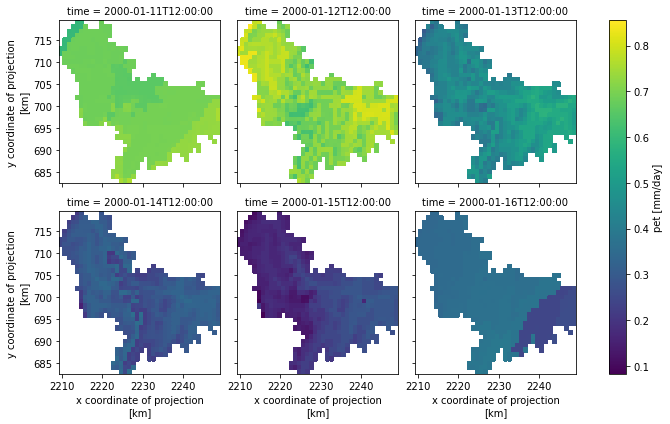

In [6]:
clm_g.isel(time=slice(10, 16)).pet.plot(x="x", y="y", row="time", col_wrap=3);

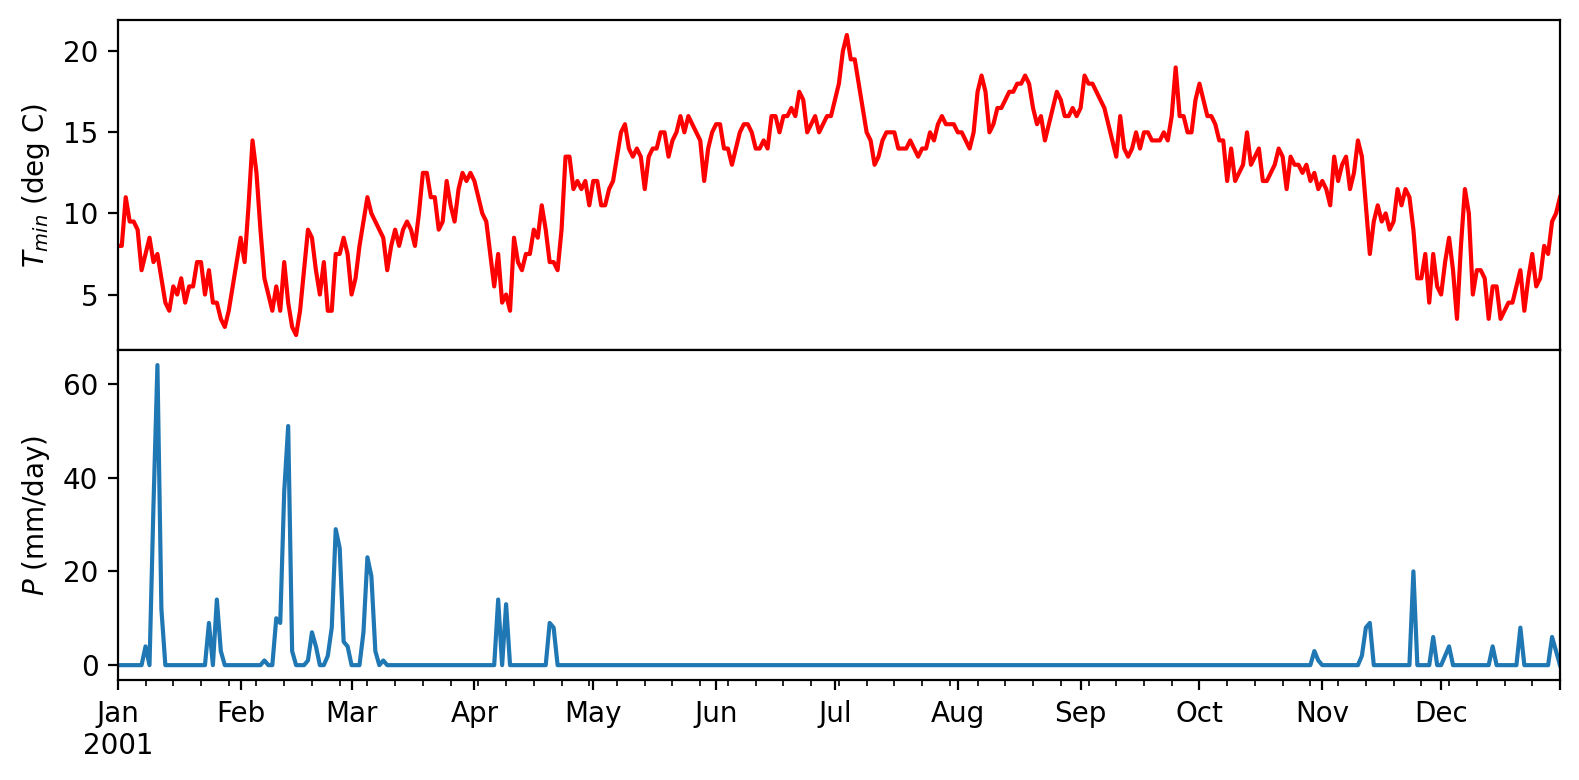

In [7]:
fig = plt.figure(figsize=(8, 4), dpi=200)

gs = fig.add_gridspec(1, 2)
axes = gs[:].subgridspec(2, 1, hspace=0).subplots(sharex=True)
clm_p["tmin (deg c)"].plot(ax=axes[0], color="r")
axes[0].set_ylabel("$T_{min}$ (deg C)")
axes[0].xaxis.set_ticks_position('none') 
clm_p["prcp (mm/day)"].plot(ax=axes[1])
axes[1].set_ylabel("$P$ (mm/day)")

plt.tight_layout()